# Sector-Based ETF Portfolio Optimization  
### Role: Registered Investment Advisor (RIA)  
In this project, I act as a Registered Investment Advisor managing a sector-based ETF portfolio. The objective is to analyze and optimize a 5-ETF portfolio over the period from 01/01/2015 to 12/31/2024, using Python to compute returns, risks, beta, correlation, and optimal weights under constraints.

**Tools Used:** pandas, NumPy, matplotlib  
**Period Analyzed:** 01/01/2015 – 10/31/2024  
**Client Profile:** Conservative, diversification-focused  


In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize

# PART-1, Calculating the monthly returns for Equal Weighted Portfolio for the chosen 5 ETF's (PORTFOLIO 1)

etfs = ['XLY', 'XLV', 'XLK', 'XLU', 'XLP']
start_date = '2015-01-01'
end_date = '2024-12-31'

price_data = yf.download(etfs, start=start_date, end=end_date, interval='1mo', auto_adjust=False)
adj_close_etfs = price_data['Adj Close']
adj_close_etfs = adj_close_etfs.fillna(method='ffill')
adj_close_etfs.to_csv('etfs_monthly_prices.csv')
adj_close_etfs.head()

etfs_monthly_prices = pd.read_csv('etfs_monthly_prices.csv', index_col=0, parse_dates=True)
monthly_returns_etfs = adj_close_etfs.pct_change().dropna()
monthly_returns_etfs.head()

weights_port_1 = np.array([0.2] * 5)

monthly_returns_port_1 = monthly_returns_etfs.dot(weights_port_1)
monthly_returns_port_1.name = ('Portfolio 1 Monthly Returns')
monthly_returns_port_1.head().round(3)

[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-1-3102836196.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close_etfs = adj_close_etfs.fillna(method='ffill')


,Portfolio 1 Monthly Returns
Date,
2015-02-01,0.037
2015-03-01,-0.017
2015-04-01,0.006
2015-05-01,0.018
2015-06-01,-0.029


In [2]:
# Calculating Average Monthly Return of PORTFOLIO 1

avg_monthly_return_port_1 = monthly_returns_port_1.mean()
print('Average Monthly Return of PORTFOLIO 1:', avg_monthly_return_port_1.round(3))

Average Monthly Return of PORTFOLIO 1: 0.011


In [3]:
# Calculating the Annualized return of PORTFOLIO 1

annualized_return_port_1 = (1+ avg_monthly_return_port_1)**12-1
print('Annualized Return of PORTFOLIO 1:', annualized_return_port_1.round(3))

Annualized Return of PORTFOLIO 1: 0.134


[*********************100%***********************]  1 of 1 completed

Annualized Return of ETFs, SPY (2015-2024)
Ticker
XLK    0.231
XLY    0.160
SPY    0.148
XLV    0.100
XLU    0.094
XLP    0.088
dtype: float64
ETFs that outperformed S&P500
Ticker
XLK    0.231
XLY    0.160
dtype: float64



/tmp/ipython-input-4-1176985535.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close_spy = adj_close_spy.fillna(method='ffill')


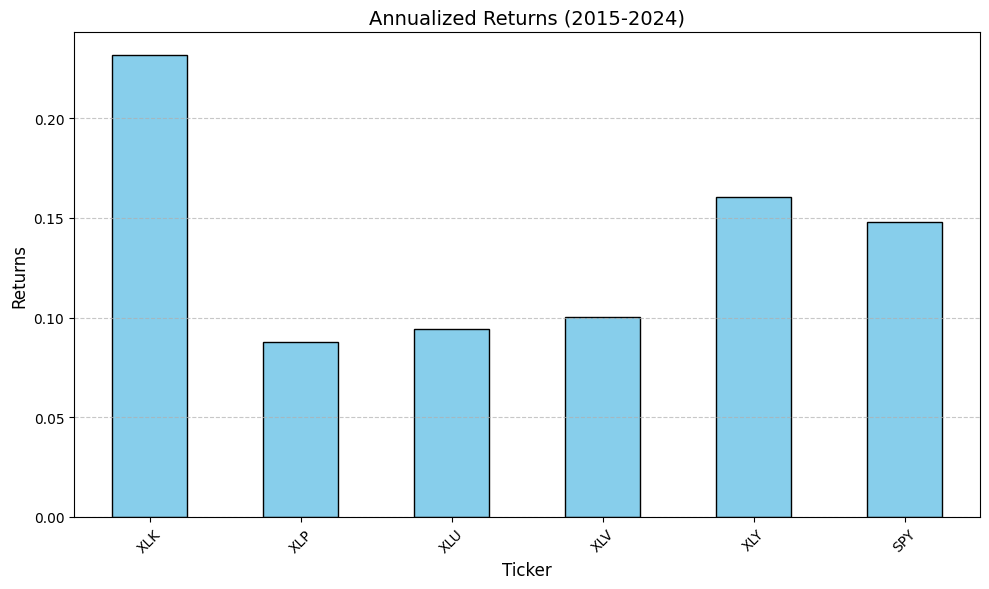

In [4]:
# Calculating the Annualized return of S&P 500 and all 5 ETFs during the same period

benchmark_1 = ['SPY']
start_date = '2015-01-01'
end_date = '2024-12-31'

price_data = yf.download(benchmark_1, start=start_date, end=end_date, interval='1mo', auto_adjust=False)
adj_close_spy = price_data['Adj Close']
adj_close_spy = adj_close_spy.fillna(method='ffill')
adj_close_spy.head()

monthly_returns_spy = adj_close_spy.pct_change().dropna()
avg_monthly_return_spy = monthly_returns_spy['SPY'].mean()
annualized_return_spy = (1+avg_monthly_return_spy)**12-1

avg_monthly_return_etfs = monthly_returns_etfs.mean()
annualized_return_etfs = (1+avg_monthly_return_etfs)**12-1

annualized_return_etfs_spy = annualized_return_etfs.copy()
annualized_return_etfs_spy['SPY'] = annualized_return_spy
print('Annualized Return of ETFs, SPY (2015-2024)')
print(annualized_return_etfs_spy.sort_values(ascending=False).round(3))

# Calculating ETFs (if any) outperforms the S&P 500 during the same period

outperformers_etfs_spy = annualized_return_etfs[annualized_return_etfs > annualized_return_spy]
print('ETFs that outperformed S&P500')
print(outperformers_etfs_spy.round(3))

# Plotting the Annualized return of S&P 500 and all 5 ETFs during the same period

plt.figure(figsize=(10, 6))
annualized_return_etfs_spy.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Annualized Returns (2015-2024)', fontsize=14)
plt.ylabel('Returns', fontsize=12)
plt.xlabel('Ticker', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Annualized Return of ETFs, SPY, NDQ (2015-2024)
Ticker
XLK     0.231
QQQM    0.198
XLY     0.160
SPY     0.148
XLV     0.100
XLU     0.094
XLP     0.088
dtype: float64
ETFs that outperformed NDQ100
Ticker
XLK    0.231
dtype: float64



/tmp/ipython-input-5-2194471211.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close_ndq = adj_close_ndq.fillna(method='ffill')


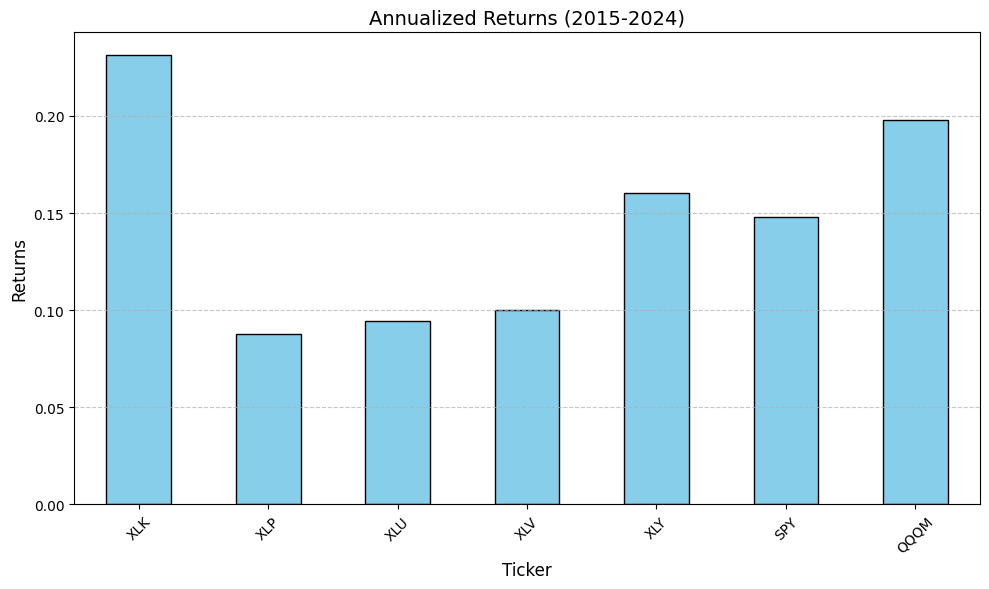

In [5]:
# Calculating the Annualized return of NDQ 100, S&P 500 and all 5 ETFs during the same period

benchmark_2 = ['QQQM']
start_date = '2015-01-01'
end_date = '2024-12-31'

price_data = yf.download(benchmark_2, start=start_date, end=end_date, interval='1mo', auto_adjust=False)
adj_close_ndq = price_data['Adj Close']
adj_close_ndq = adj_close_ndq.fillna(method='ffill')
adj_close_ndq.head()


monthly_returns_ndq = adj_close_ndq.pct_change().dropna()
avg_monthly_return_ndq = monthly_returns_ndq['QQQM'].mean()
annualized_return_ndq = (1+avg_monthly_return_ndq)**12-1

annualized_return_etfs_spy_ndq = annualized_return_etfs.copy()
annualized_return_etfs_spy_ndq['SPY'] = annualized_return_spy
annualized_return_etfs_spy_ndq['QQQM'] = annualized_return_ndq
print('Annualized Return of ETFs, SPY, NDQ (2015-2024)')
print(annualized_return_etfs_spy_ndq.sort_values(ascending=False).round(3))

# Calculating ETFs (if any) outperforms the NDQ 100 during the same period

outperformers_etfs_spy_qqqm = annualized_return_etfs[annualized_return_etfs > annualized_return_ndq]
print('ETFs that outperformed NDQ100')
print(outperformers_etfs_spy_qqqm.round(3))


# Plotting the Annualized return of NDQ 100, S&P 500 and all 5 ETFs during the same period

plt.figure(figsize=(10, 6))
annualized_return_etfs_spy_ndq.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Annualized Returns (2015-2024)', fontsize=14)
plt.ylabel('Returns', fontsize=12)
plt.xlabel('Ticker', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
#	Calculating the highest risk and the lowest risk ETFS

monthly_std_etfs = monthly_returns_etfs.std()
annualized_std_etfs = monthly_std_etfs*(12**0.5)
highest_risk_etf = annualized_std_etfs.idxmax()
lowest_risk_etf = annualized_std_etfs.idxmin()

print('Highest Risk ETF:', highest_risk_etf)
print('Lowest Risk ETF:', lowest_risk_etf)


Highest Risk ETF: XLY
Lowest Risk ETF: XLP


In [7]:
# Calculating the beta and the correlation of PORTFOLIO 1 to the S&P 500

port_1_correlation_with_spy = monthly_returns_port_1.corr(monthly_returns_spy['SPY'])
print('Portfolio 1 Correlation with SP500:', port_1_correlation_with_spy.round(3))

aligned_data = pd.concat([monthly_returns_port_1, monthly_returns_spy['SPY']], axis=1).dropna()
aligned_data.columns = ['Portfolio', 'SPY']
x = sm.add_constant(aligned_data['SPY'])
y = aligned_data['Portfolio']
model = sm.OLS(y, x).fit()

beta = model.params['SPY']
print('Beta of Portfolio 1 vs S&P500:', beta.round(3))

Portfolio 1 Correlation with SP500: 0.953
Beta of Portfolio 1 vs S&P500: 0.829


In [8]:
# Part II, Calculating Portfolio that Maximizes the return (PORTFOLIO 1a)

def neg_portfolio_1a_return(weights):
  port_1a_max_return = np.dot(weights, avg_monthly_return_etfs)
  return -((1+ port_1a_max_return)**12-1)

# Ensuring that the weights are greater than or equal to zero in each of the ETFs.

constraint_max_return_port_1a = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
    }

# Also, ensuring that its well-diversified, not owning more than 35% in a single ETF.

bounds = tuple((0, 0.35) for _ in avg_monthly_return_etfs)
init_guess = np.array([1/len(avg_monthly_return_etfs)] * len(avg_monthly_return_etfs))
opt_result_max_return_port_1a = minimize(
    neg_portfolio_1a_return,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraint_max_return_port_1a
    )

# Calculating the new weights that would achieve the objective

optimal_weights_port_1a = opt_result_max_return_port_1a.x
optimal_weights_max_return_port_1a = pd.Series(optimal_weights_port_1a, index=avg_monthly_return_etfs.index)

monthly_returns_port_1a = monthly_returns_etfs.dot(optimal_weights_max_return_port_1a).dropna()

print('Portfolio 1a Optimal Weights')
print(optimal_weights_max_return_port_1a.round(3))

Portfolio 1a Optimal Weights
Ticker
XLK    0.35
XLP    0.00
XLU    0.00
XLV    0.30
XLY    0.35
dtype: float64


In [9]:
# Calculating average monthly return of Portfolio 1a

avg_monthly_return_port_1a = np.dot(optimal_weights_max_return_port_1a, avg_monthly_return_etfs)
print('Avergae Monthly Return of Portfolio 1a :', avg_monthly_return_port_1a.round(3))

Avergae Monthly Return of Portfolio 1a : 0.013


In [10]:
# Calculating annualized return of Portfolio 1a

annualized_return_port_1a = - opt_result_max_return_port_1a.fun
print('Annaulized Return of Portfolio 1a :', annualized_return_port_1a.round(3))

Annaulized Return of Portfolio 1a : 0.166


In [11]:
# Calculating annualized risk of Portfolio 1a

cov_matrix_etfs = monthly_returns_etfs.cov()
weights_port_1a = optimal_weights_max_return_port_1a.values
monthly_std_port_1a = np.sqrt(np.dot(weights_port_1a.T, np.dot(cov_matrix_etfs, weights_port_1a)))
annualized_std_port_1a = monthly_std_port_1a * np.sqrt(12)
print('Annualized risk of Portfolio 1a :', annualized_std_port_1a.round(3))

Annualized risk of Portfolio 1a : 0.165


In [12]:
# Calculating Portfolio that Minimizes the risk (PORTFOLIO 1b)

def portfolio_1b_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix_etfs, weights)))

# Ensuring that the weights are greater than or equal to zero in each of the ETFs.

constraint_min_risk_port_1b = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
    }

# Also, ensuring that its well-diversified, not owning more than 35% in a single ETF.

bounds = tuple((0, 0.35) for _ in avg_monthly_return_etfs)
init_guess = np.array([1/len(avg_monthly_return_etfs)] * len(avg_monthly_return_etfs))
opt_result_min_risk_port_1b = minimize(
    portfolio_1b_risk,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraint_min_risk_port_1b
    )

# Calculating the new weights that would achieve the objective

optimal_weights_port_1b = opt_result_min_risk_port_1b.x
optimal_weights_min_risk_port_1b = pd.Series(optimal_weights_port_1b, index=avg_monthly_return_etfs.index)

monthly_returns_port_1b = monthly_returns_etfs.dot(optimal_weights_min_risk_port_1b).dropna()

print('Portfolio 1b Optimal Weights')
print(optimal_weights_min_risk_port_1b.round(3))

Portfolio 1b Optimal Weights
Ticker
XLK    0.034
XLP    0.350
XLU    0.266
XLV    0.350
XLY    0.000
dtype: float64


In [13]:
# Calculating average monthly return of Portfolio 1b

avg_monthly_return_port_1b = np.dot(optimal_weights_min_risk_port_1b, avg_monthly_return_etfs)
print('Average Monthly Return of Portfolio 1b :', avg_monthly_return_port_1b.round(3))

Average Monthly Return of Portfolio 1b : 0.008


In [14]:
# Calculating annualized return of Portfolio 1b

annualized_return_port_1b = (1+avg_monthly_return_port_1b)**12-1
print('Annualized Return of Portfolio 1b :', annualized_return_port_1b.round(3))

Annualized Return of Portfolio 1b : 0.099


In [15]:
# Calculating annualized risk of Portfolio 1b

monthly_std_port_1b = np.sqrt(np.dot(optimal_weights_min_risk_port_1b.T, np.dot(monthly_returns_etfs.cov(), optimal_weights_min_risk_port_1b)))
annualized_std_port_1b = monthly_std_port_1b * np.sqrt(12)
print('Annualized risk of Portfolio 1b :', annualized_std_port_1b.round(3))

Annualized risk of Portfolio 1b : 0.124


In [16]:
# Part 3,  Calculating the Average Monthly return and Annualized return for Equal Weighted Portfolio for the chosen 5 ETF's + SP500 (PORTFOLIO 2)

spy_monthly_prices = adj_close_spy.squeeze()
spy_monthly_prices.name = 'SPY'
etfs_spy_prices = pd.concat([etfs_monthly_prices, spy_monthly_prices], axis=1)
monthly_returns_etfs_spy = etfs_spy_prices.pct_change().dropna()
weights_port_2 = np.repeat(1/6, 6)

monthly_returns_port_2 = monthly_returns_etfs_spy.dot(weights_port_2).dropna()
avg_monthly_return_port_2 = np.dot(weights_port_2, monthly_returns_etfs_spy.mean())
annualized_return_port_2 = (1+ avg_monthly_return_port_2)**12-1

print('Average Monthly Return of Portfolio 2 :', avg_monthly_return_port_2.round(3))
print('Annualized Return of Portfolio 2 :', annualized_return_port_2.round(3))




Average Monthly Return of Portfolio 2 : 0.011
Annualized Return of Portfolio 2 : 0.136


In [17]:
# Calculating annualized risk for Portfolio 2

monthly_std_port_2 = np.sqrt(np.dot(weights_port_2.T, np.dot(monthly_returns_etfs_spy.cov(), weights_port_2)))
annualized_std_port_2 = monthly_std_port_2 *np.sqrt(12)
print('Annualized Risk of Portfolio 2 :', annualized_std_port_2.round(3))

Annualized Risk of Portfolio 2 : 0.139


In [18]:
# Calculating the risk difference between Portfolio 1 and Portfolio 2

annualized_std_port_1 = np.sqrt(np.dot(weights_port_1.T, np.dot(monthly_returns_etfs.cov(), weights_port_1))) * np.sqrt(12)
print('Annualized Risk of Portfolio 1 :', annualized_std_port_1.round(3))
if annualized_std_port_2 > annualized_std_port_1:
  print('Risk Increased - Adding SPY introduced more volatility.')
elif annualized_std_port_2 < annualized_std_port_1:
  print('Risk Decreased - Adding SPY diversified and reduced volatality.')
else:
  print('Risk Unchanged - SPY didnt impact portfolio variance.')

why_explanation = """
Why?

SPY includes large positions in tech, consumer discretionary, and financials,
which are already represented in the 5 sector ETFs. Adding SPY increased exposure
to overlapping sectors, causing higher overall correlation and portfolio volatility.
"""
print(why_explanation)


Annualized Risk of Portfolio 1 : 0.136
Risk Increased - Adding SPY introduced more volatility.

Why?

SPY includes large positions in tech, consumer discretionary, and financials,
which are already represented in the 5 sector ETFs. Adding SPY increased exposure
to overlapping sectors, causing higher overall correlation and portfolio volatility.



In [19]:
# Calculating Portfolio that maximizes return(PORTFOLIO 2a)

avg_return_port_2a = monthly_returns_etfs_spy.mean()
def neg_portfolio_2a_return(weights):
  return -np.dot(weights, avg_return_port_2a)

# Ensuring that the weights are greater than or equal to zero in each of the ETFs.

constraint_max_return_port_2a = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
    }

# Also, ensuring that its well-diversified, not owning more than 35% in a single ETF.

num_assets_max = len(avg_return_port_2a)
bounds = [(0, 0.35) for _ in range(num_assets_max)]
init_guess = np.repeat(1/num_assets_max, num_assets_max)
opt_result_max_return_port_2a = minimize(
    neg_portfolio_2a_return,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraint_max_return_port_2a
    )

# Calculating the new weights that would achieve the objective

optimal_weights_port_2a = opt_result_max_return_port_2a.x
optimal_weights_max_return_port_2a = pd.Series(optimal_weights_port_2a, index=monthly_returns_etfs_spy.columns)

print('Portfolio 2a Optimal Weights')
print(optimal_weights_max_return_port_2a.round(3))

# Calculating the Annulized return and risk for the optimized portfolio 2a

weights_port_2a = optimal_weights_max_return_port_2a.values
monthly_returns_port_2a = monthly_returns_etfs_spy.dot(weights_port_2a)
annualized_return_port_2a = (1+ monthly_returns_port_2a.mean())**12-1
annualized_std_port_2a = monthly_returns_port_2a.std() * np.sqrt(12)

print('Annauliazed Return of Portfolio 2a :', annualized_return_port_2a.round(3))
print('Annaulized Risk of Portfolio 2a :', annualized_std_port_2a.round(3))

Portfolio 2a Optimal Weights
XLK    0.35
XLP    0.00
XLU    0.00
XLV    0.00
XLY    0.35
SPY    0.30
dtype: float64
Annauliazed Return of Portfolio 2a : 0.181
Annaulized Risk of Portfolio 2a : 0.178


In [20]:
# Calculating Portfolio that minimizes risk (PORTFOLIO 2b)

cov_matrix_etfs_spy = monthly_returns_etfs_spy.cov()
def portfolio_2b_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix_etfs_spy, weights)))

# Ensuring that the weights are greater than or equal to zero in each of the ETFs.

constraint_min_risk_port_2b = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
    }

# Also, ensuring that its well-diversified, not owning more than 35% in a single ETF.

num_assets_min = len(monthly_returns_etfs_spy.columns)
bounds = [(0, 0.35) for _ in range(num_assets_min)]
init_guess = np.repeat(1/num_assets_min, num_assets_min)
opt_result_min_risk_port_2b = minimize(
    portfolio_2b_risk,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraint_min_risk_port_2b
    )

# Calculating the  new weights that would achieve the objective

optimal_weights_port_2b = opt_result_min_risk_port_2b.x
optimal_weights_min_risk_port_2b = pd.Series(optimal_weights_port_2b, index=monthly_returns_etfs_spy.columns)

print('Portfolio 2b Optimal Weights')
print(optimal_weights_min_risk_port_2b.round(3))

# Calculating the Annulized return and risk for the optimized portfolio 2b

weights_port_2b = optimal_weights_min_risk_port_2b.values
monthly_returns_port_2b = monthly_returns_etfs_spy.dot(weights_port_2b)
annualized_return_port_2b = (1+ monthly_returns_port_2b.mean())**12-1
annualized_std_port_2b = monthly_returns_port_2b.std() * np.sqrt(12)

print('Annauliazed Return of Portfolio 2b :', annualized_return_port_2b.round(3))
print('Annaulized Risk of Portfolio 2b :', annualized_std_port_2b.round(3))

Portfolio 2b Optimal Weights
XLK    0.004
XLP    0.350
XLU    0.254
XLV    0.350
XLY    0.000
SPY    0.042
dtype: float64
Annauliazed Return of Portfolio 2b : 0.097
Annaulized Risk of Portfolio 2b : 0.124


In [21]:
#  Calculating Portfolio that maximizes the Sharpe, assuming risk free rate at 2% (PORTFOLIO 2c)

risk_free_rate =  0.02

def neg_sharpe_ratio_portfolio_2c(weights):
  port_2c_returns = np.dot(weights, annualized_return_etfs_spy)
  port_2c_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_etfs_spy, weights)))
  sharpe_ratio_port_2c = (port_2c_returns - risk_free_rate) / port_2c_std
  return -sharpe_ratio_port_2c

# Ensuring that the weights are greater than or equal to zero in each of the ETFs.

constraint_max_sharpe_port_2c = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
    }

# Also, ensuring that its well-diversified, not owning more than 35% in a single ETF.

bounds = [(0, 0.35) for _ in range(num_assets_max)]
init_guess = np.repeat(1/num_assets_max, num_assets_max)
opt_result_max_sharpe_port_2c = minimize(
    neg_sharpe_ratio_portfolio_2c,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraint_max_sharpe_port_2c
    )

# Calculating the  new weights that would achieve the objective

optimal_weights_max_sharpe = opt_result_max_sharpe_port_2c.x
optimal_weights_max_sharpe_port_2c = pd.Series(optimal_weights_max_sharpe, index=monthly_returns_etfs_spy.columns)

print('Portfolio 2c Optimal Weights')
print(optimal_weights_max_sharpe_port_2c.round(3))

 # Calculating the Annulized return and risk for the optimized portfolio 2c

weights_port_2c = optimal_weights_max_sharpe_port_2c.values
monthly_returns_port_2c = monthly_returns_etfs_spy.dot(weights_port_2c)
annualized_return_port_2c = (1+ monthly_returns_port_2c.mean())**12-1
annualized_std_port_2c = monthly_returns_port_2c.std() * np.sqrt(12)

print('Annauliazed Return of Portfolio 2c :', annualized_return_port_2c.round(3))
print('Annaulized Risk of Portfolio 2c :', annualized_std_port_2c.round(3))

Portfolio 2c Optimal Weights
XLK    0.350
XLP    0.000
XLU    0.248
XLV    0.052
XLY    0.000
SPY    0.350
dtype: float64
Annauliazed Return of Portfolio 2c : 0.16
Annaulized Risk of Portfolio 2c : 0.147


In [22]:
# PART 4,  Calculating Sharpe Ratio for Portfolio 1, 1a, 1b assuming risk free rate = 2%

Sharpe_ratio_port_1 = (annualized_return_port_1 - risk_free_rate) / annualized_std_port_1
Sharpe_ratio_port_1a = (annualized_return_port_1a - risk_free_rate) / annualized_std_port_1a
Sharpe_ratio_port_1b = (annualized_return_port_1b - risk_free_rate) / annualized_std_port_1b

# Calculating treynor Ratio for Portfolio 1, 1a, 1b assuming risk free rate = 2%

Treynor_ratio_port_1 = (annualized_return_port_1 - risk_free_rate) / beta
Treynor_ratio_port_1a = (annualized_return_port_1a - risk_free_rate) / beta
Treynor_ratio_port_1b = (annualized_return_port_1b - risk_free_rate) / beta

# Calculating Information Ratio for Portfolio 1, 1a, 1b assuming risk free rate = 2%

active_return_port_1 = annualized_return_port_1 - annualized_return_spy
active_return_port_1a = annualized_return_port_1a - annualized_return_spy
active_return_port_1b = annualized_return_port_1b - annualized_return_spy

active_monthly_return_port_1 = monthly_returns_port_1 - monthly_returns_spy['SPY']
active_monthly_return_port_1a = monthly_returns_port_1a - monthly_returns_spy['SPY']
active_monthly_return_port_1b = monthly_returns_port_1b - monthly_returns_spy['SPY']

tracking_error_port_1 = np.std(active_monthly_return_port_1) * np.sqrt(12)
tracking_error_port_1a = np.std(active_monthly_return_port_1a) * np.sqrt(12)
tracking_error_port_1b = np.std(active_monthly_return_port_1b) * np.sqrt(12)

Information_ratio_port_1 = active_return_port_1 / tracking_error_port_1
Information_ratio_port_1a = active_return_port_1a / tracking_error_port_1a
Information_ratio_port_1b = active_return_port_1b / tracking_error_port_1b


print('Performance Ratios for Portfolio 1')
print(f'Sharpe Ratio : {Sharpe_ratio_port_1:.3f} | Treyner Ratio : {Treynor_ratio_port_1:.3f} | Information Ratio: {Information_ratio_port_1:.3f}')

print('Performance Ratios for Portfolio 1a')
print(f'Sharpe Ratio : {Sharpe_ratio_port_1a:.3f} | Treyner Ratio : {Treynor_ratio_port_1a:.3f} | Information Ratio: {Information_ratio_port_1a:.3f}')

print('Performance Ratios for Portfolio 1b')
print(f'Sharpe Ratio : {Sharpe_ratio_port_1b:.3f} | Treyner Ratio : {Treynor_ratio_port_1b:.3f} | Information Ratio: {Information_ratio_port_1b:.3f}')

Performance Ratios for Portfolio 1
Sharpe Ratio : 0.834 | Treyner Ratio : 0.137 | Information Ratio: -0.291
Performance Ratios for Portfolio 1a
Sharpe Ratio : 0.884 | Treyner Ratio : 0.176 | Information Ratio: 0.440
Performance Ratios for Portfolio 1b
Sharpe Ratio : 0.634 | Treyner Ratio : 0.095 | Information Ratio: -0.548


In [23]:
# Calculating Downside risk of Portfolio 1, 1a, 1b using 1% Target (MER)

Target_return = 0.01 / 12

downside_diff_port_1 = np.minimum(monthly_returns_port_1 - Target_return, 0)
downside_diff_port_1a = np.minimum(monthly_returns_port_1a - Target_return,0)
downside_diff_port_1b = np.minimum(monthly_returns_port_1b - Target_return, 0)

downside_std_monthly_port_1 = np.sqrt(np.mean(downside_diff_port_1**2))
downside_std_monthly_port_1a = np.sqrt(np.mean(downside_diff_port_1a**2))
downside_std_monthly_port_1b = np.sqrt(np.mean(downside_diff_port_1b**2))

Annualized_downside_std_port_1 = downside_std_monthly_port_1 * np.sqrt(12)
Annualized_downside_std_port_1a = downside_std_monthly_port_1a * np.sqrt(12)
Annualized_downside_std_port_1b = downside_std_monthly_port_1b * np.sqrt(12)

print('Downside Risk of Portfolio 1 (1% MER as target):', Annualized_downside_std_port_1.round(3))
print('Downside Risk of Portfolio 1a (1% MER as target):', Annualized_downside_std_port_1a.round(3))
print('Downside Risk of Portfolio 1b (1% MER as target):', Annualized_downside_std_port_1b.round(3))

Downside Risk of Portfolio 1 (1% MER as target): 0.084
Downside Risk of Portfolio 1a (1% MER as target): 0.099
Downside Risk of Portfolio 1b (1% MER as target): 0.078


In [24]:
# PART 5, Calculating Sharpe Ratio for Portfolio 2, 2a, 2b, 2c assuming risk free rate = 2%

Sharpe_ratio_port_2 = (annualized_return_port_2 - risk_free_rate) / annualized_std_port_2
Sharpe_ratio_port_2a = (annualized_return_port_2a - risk_free_rate) / annualized_std_port_2a
Sharpe_ratio_port_2b = (annualized_return_port_2b - risk_free_rate) / annualized_std_port_2b
Sharpe_ratio_port_2c = (annualized_return_port_2c - risk_free_rate) / annualized_std_port_2c

# Calculating treynor Ratio for Portfolio 2, 2a, 2b, 2c assuming risk free rate = 2%

aligned_data_2 = pd.concat([monthly_returns_port_2, monthly_returns_ndq['QQQM']], axis=1).dropna()
aligned_data_2.columns = ['Portfolio', 'QQQM']
x1 = sm.add_constant(aligned_data_2['QQQM'])
y1 = aligned_data_2['Portfolio']
model = sm.OLS(y1, x1).fit()

beta_2 = model.params['QQQM']
print('Beta of Portfolio 2 vs NDQ100:', beta_2.round(3))

Treynor_ratio_port_2 = (annualized_return_port_2 - risk_free_rate) / beta_2
Treynor_ratio_port_2a = (annualized_return_port_2a - risk_free_rate) / beta_2
Treynor_ratio_port_2b = (annualized_return_port_2b - risk_free_rate) / beta_2
Treynor_ratio_port_2c = (annualized_return_port_2c - risk_free_rate) / beta_2

# Calculating Information Ratio for Portfolio 2, 2a, 2b, 2c assuming risk free rate = 2%

active_return_port_2 = annualized_return_port_2 - annualized_return_ndq
active_return_port_2a = annualized_return_port_2a - annualized_return_ndq
active_return_port_2b = annualized_return_port_2b - annualized_return_ndq
active_return_port_2c = annualized_return_port_2c - annualized_return_ndq


active_monthly_return_port_2 = monthly_returns_port_2 - monthly_returns_ndq['QQQM']
active_monthly_return_port_2a = monthly_returns_port_2a - monthly_returns_ndq['QQQM']
active_monthly_return_port_2b = monthly_returns_port_2b - monthly_returns_ndq['QQQM']
active_monthly_return_port_2c = monthly_returns_port_2c - monthly_returns_ndq['QQQM']


tracking_error_port_2 = np.std(active_monthly_return_port_2) * np.sqrt(12)
tracking_error_port_2a = np.std(active_monthly_return_port_2a) * np.sqrt(12)
tracking_error_port_2b = np.std(active_monthly_return_port_2b) * np.sqrt(12)
tracking_error_port_2c = np.std(active_monthly_return_port_2c) * np.sqrt(12)

Information_ratio_port_2 = active_return_port_2 / tracking_error_port_2
Information_ratio_port_2a = active_return_port_2a / tracking_error_port_2a
Information_ratio_port_2b = active_return_port_2b / tracking_error_port_2b
Information_ratio_port_2c = active_return_port_2c / tracking_error_port_2c


print('Performance Ratios for Portfolio 2')
print(f'Sharpe Ratio : {Sharpe_ratio_port_2:.3f} | Treyner Ratio : {Treynor_ratio_port_2:.3f} | Information Ratio: {Information_ratio_port_2:.3f}')

print('Performance Ratios for Portfolio 2a')
print(f'Sharpe Ratio : {Sharpe_ratio_port_2a:.3f} | Treyner Ratio : {Treynor_ratio_port_2a:.3f} | Information Ratio: {Information_ratio_port_2a:.3f}')

print('Performance Ratios for Portfolio 2b')
print(f'Sharpe Ratio : {Sharpe_ratio_port_2b:.3f} | Treyner Ratio : {Treynor_ratio_port_2b:.3f} | Information Ratio: {Information_ratio_port_2b:.3f}')

print('Performance Ratios for Portfolio 2b')
print(f'Sharpe Ratio : {Sharpe_ratio_port_2c:.3f} | Treyner Ratio : {Treynor_ratio_port_2c:.3f} | Information Ratio: {Information_ratio_port_2c:.3f}')

Beta of Portfolio 2 vs NDQ100: 0.65
Performance Ratios for Portfolio 2
Sharpe Ratio : 0.837 | Treyner Ratio : 0.178 | Information Ratio: -0.617
Performance Ratios for Portfolio 2a
Sharpe Ratio : 0.904 | Treyner Ratio : 0.248 | Information Ratio: -0.352
Performance Ratios for Portfolio 2b
Sharpe Ratio : 0.619 | Treyner Ratio : 0.118 | Information Ratio: -0.612
Performance Ratios for Portfolio 2b
Sharpe Ratio : 0.951 | Treyner Ratio : 0.216 | Information Ratio: -0.452


In [25]:
# Calculating Downside risk of Portfolio 2, 2a, 2b, 2c using 1% Target (MER)

Target_return = 0.01 / 12

downside_diff_port_2 = np.minimum(monthly_returns_port_2 - Target_return, 0)
downside_diff_port_2a = np.minimum(monthly_returns_port_2a - Target_return,0)
downside_diff_port_2b = np.minimum(monthly_returns_port_2b - Target_return, 0)
downside_diff_port_2c = np.minimum(monthly_returns_port_2c - Target_return, 0)

downside_std_monthly_port_2 = np.sqrt(np.mean(downside_diff_port_2**2))
downside_std_monthly_port_2a = np.sqrt(np.mean(downside_diff_port_2a**2))
downside_std_monthly_port_2b = np.sqrt(np.mean(downside_diff_port_2b**2))
downside_std_monthly_port_2c = np.sqrt(np.mean(downside_diff_port_2c**2))

Annualized_downside_std_port_2 = downside_std_monthly_port_2 * np.sqrt(12)
Annualized_downside_std_port_2a = downside_std_monthly_port_2a * np.sqrt(12)
Annualized_downside_std_port_2b = downside_std_monthly_port_2b * np.sqrt(12)
Annualized_downside_std_port_2c = downside_std_monthly_port_2c * np.sqrt(12)

print('Downside Risk of Portfolio 2 (1% MER as target):', Annualized_downside_std_port_2.round(3))
print('Downside Risk of Portfolio 2a (1% MER as target):', Annualized_downside_std_port_2a.round(3))
print('Downside Risk of Portfolio 2b (1% MER as target):', Annualized_downside_std_port_2b.round(3))
print('Downside Risk of Portfolio 2c (1% MER as target):', Annualized_downside_std_port_2c.round(3))

Downside Risk of Portfolio 2 (1% MER as target): 0.085
Downside Risk of Portfolio 2a (1% MER as target): 0.107
Downside Risk of Portfolio 2b (1% MER as target): 0.078
Downside Risk of Portfolio 2c (1% MER as target): 0.092


In [26]:
# Summarizing all the Portfolio's metrics

summary_data = {
    'Portfolio':[
        'Port 1 (Equal Weighted 5 ETFs)',
        'Port 1a (Max Return)',
        'Port 1b (Min Risk)',
        'Port 2 (Equal Weighted 5 ETFs + SPY)',
        'Port 2a (Max Return)',
        'Port 2b (Min Return)',
        'Port 2c (Max Sharpe Ratio)'
    ],
    'Annualized Return': [
        annualized_return_port_1,
        annualized_return_port_1a,
        annualized_return_port_1b,
        annualized_return_port_2,
        annualized_return_port_2a,
        annualized_return_port_2b,
        annualized_return_port_2c
    ],
    'Annualized Risk': [
        annualized_std_port_1,
        annualized_std_port_1a,
        annualized_std_port_1b,
        annualized_std_port_2,
        annualized_std_port_2a,
        annualized_std_port_2b,
        annualized_std_port_2c
    ],
    'Sharpe Ratio': [
        Sharpe_ratio_port_1,
        Sharpe_ratio_port_1a,
        Sharpe_ratio_port_1b,
        Sharpe_ratio_port_2,
        Sharpe_ratio_port_2a,
        Sharpe_ratio_port_2b,
        Sharpe_ratio_port_2c
    ],
    'Treynor Ratio': [
        Treynor_ratio_port_1,
        Treynor_ratio_port_1a,
        Treynor_ratio_port_1b,
        Treynor_ratio_port_2,
        Treynor_ratio_port_2a,
        Treynor_ratio_port_2b,
        Treynor_ratio_port_2c
    ],
    'Information Ratio': [
        Information_ratio_port_1,
        Information_ratio_port_1a,
        Information_ratio_port_1b,
        Information_ratio_port_2,
        Information_ratio_port_2a,
        Information_ratio_port_2b,
        Information_ratio_port_2c
    ],
    'Downside Risk':[
        Annualized_downside_std_port_1,
        Annualized_downside_std_port_1a,
        Annualized_downside_std_port_1b,
        Annualized_downside_std_port_2,
        Annualized_downside_std_port_2a,
        Annualized_downside_std_port_2b,
        Annualized_downside_std_port_2c
    ]
}

portfolios_summary_df = pd.DataFrame(summary_data)
styled_df = portfolios_summary_df.style\
    .highlight_max(subset=['Sharpe Ratio'], color='salmon')\
    .highlight_min(subset=['Downside Risk'], color='green')
styled_df

,Portfolio,Annualized Return,Annualized Risk,Sharpe Ratio,Treynor Ratio,Information Ratio,Downside Risk
0,Port 1 (Equal Weighted 5 ETFs),0.133673,0.136285,0.834084,0.137115,-0.290612,0.083610
1,Port 1a (Max Return),0.166121,0.165293,0.884011,0.176255,0.439553,0.099038
2,Port 1b (Min Risk),0.098613,0.124054,0.633700,0.094825,-0.548421,0.078230
3,Port 2 (Equal Weighted 5 ETFs + SPY),0.136041,0.138662,0.836863,0.178477,-0.616590,0.085488
4,Port 2a (Max Return),0.180995,0.178110,0.903911,0.247619,-0.351988,0.106997
5,Port 2b (Min Return),0.096880,0.124116,0.619418,0.118245,-0.612346,0.078396
6,Port 2c (Max Sharpe Ratio),0.160175,0.147370,0.951180,0.215596,-0.452306,0.091874


##  Final Summary — For a Conservative, Diversification-Focused Client

###  Insights:
- **Port 2c (Max Sharpe Ratio)** is the most balanced portfolio: strong returns (16.0%), the **highest Sharpe Ratio (0.951)**, and moderate downside risk (0.0919).
- It includes SPY, enhancing **broad market diversification**, while still favoring core sector ETFs.
- **Port 2a (Max Return)** is too aggressive for this client (high risk, high downside).
- **Port 1b (Min Risk)** is ultra-conservative, but gives up too much return and efficiency.

### 📈 RIA Recommendation:
> As a Registered Investment Advisor, I recommend **Port 2c** as the optimal strategy. It offers strong risk-adjusted returns while honoring the client’s preference for diversification and downside protection. This portfolio is built for long-term stability and peace of mind.

---



